<a href="https://colab.research.google.com/github/amannain122/projects/blob/main/KNN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) classifier.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Dataset contains information about the factors responsible for a person getting a credit card aprroved or not

In [ ]:
df.shape

(690, 16)

In [ ]:
X = df.drop('Approved', axis=1)
y = df['Approved']

In [ ]:
X.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 178 to 102
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          483 non-null    int64  
 1   Age             483 non-null    float64
 2   Debt            483 non-null    float64
 3   Married         483 non-null    int64  
 4   BankCustomer    483 non-null    int64  
 5   Industry        483 non-null    object 
 6   Ethnicity       483 non-null    object 
 7   YearsEmployed   483 non-null    float64
 8   PriorDefault    483 non-null    int64  
 9   Employed        483 non-null    int64  
 10  CreditScore     483 non-null    int64  
 11  DriversLicense  483 non-null    int64  
 12  Citizen         483 non-null    object 
 13  ZipCode         483 non-null    int64  
 14  Income          483 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 60.4+ KB


In [ ]:
X_train["Citizen"].unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

In [ ]:
X_train["Industry"].unique()

array(['Materials', 'Energy', 'CommunicationServices', 'ConsumerStaples',
       'Real Estate', 'Healthcare', 'Industrials', 'Utilities',
       'Financials', 'Education', 'ConsumerDiscretionary', 'Transport',
       'InformationTechnology', 'Research'], dtype=object)

In [ ]:
X_train["Ethnicity"].unique()

array(['White', 'Black', 'Latino', 'Other', 'Asian'], dtype=object)

In [ ]:
X_train.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

Dataset is clean and have only 3 categorical columns

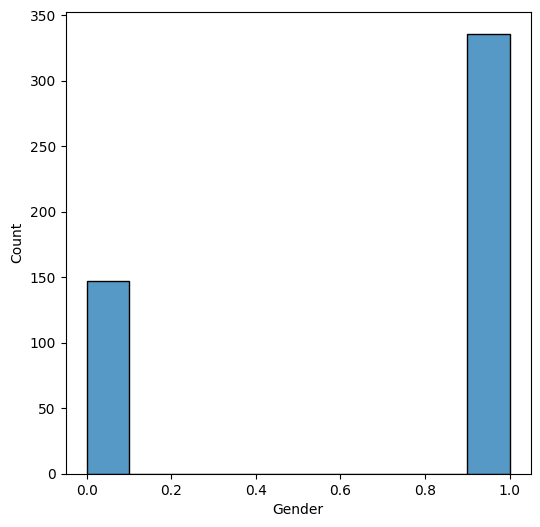

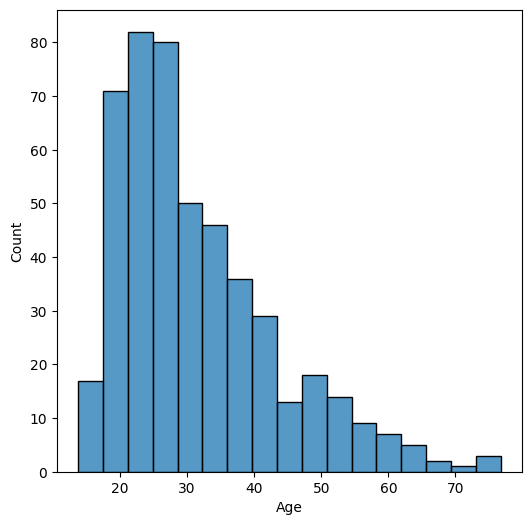

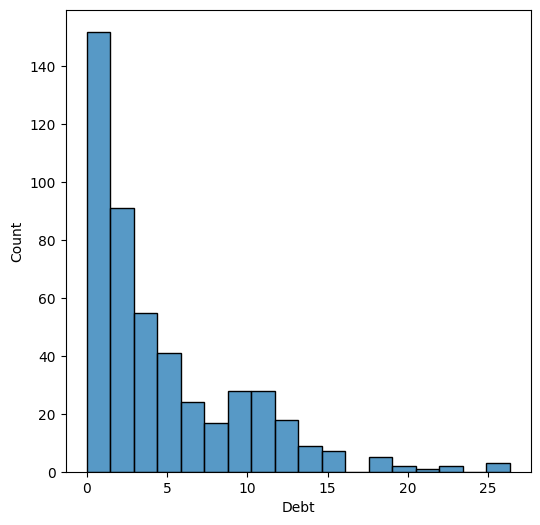

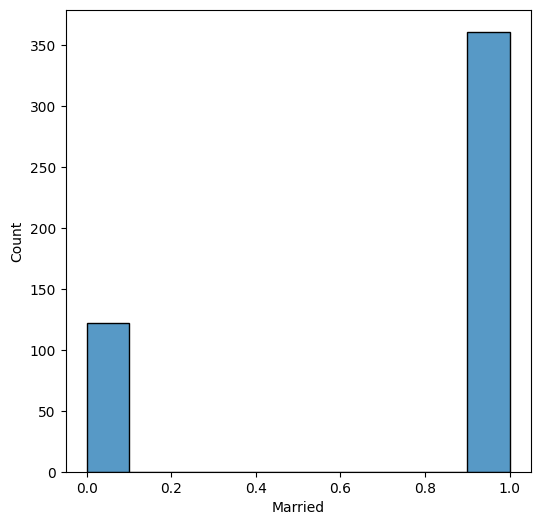

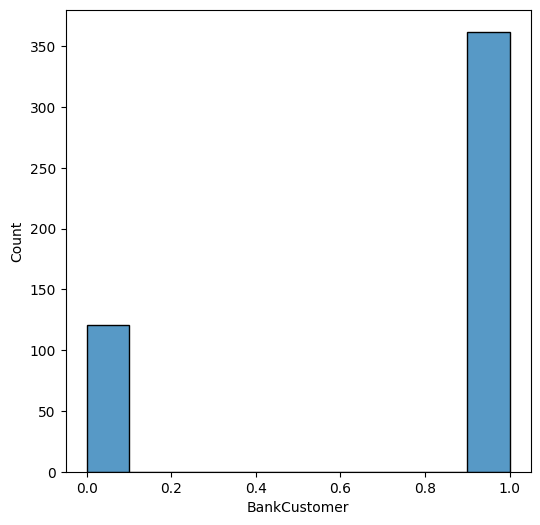

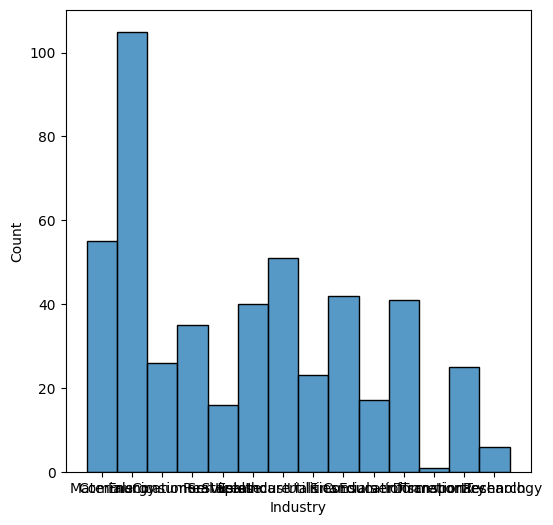

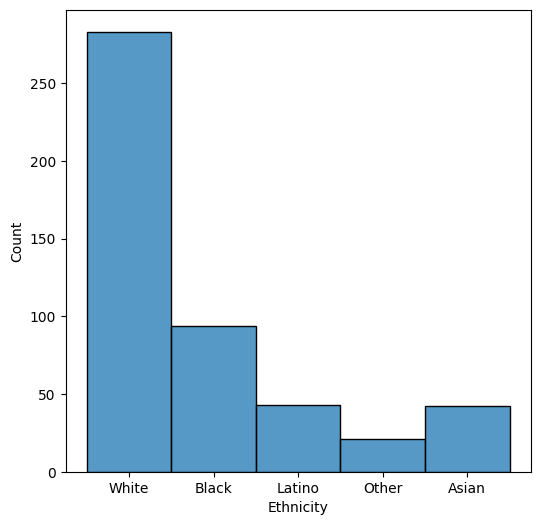

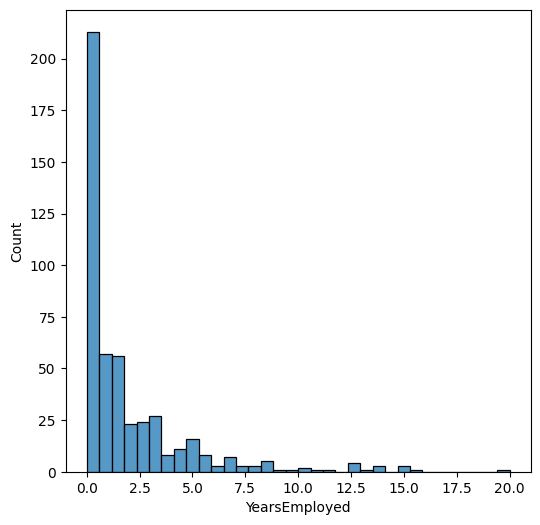

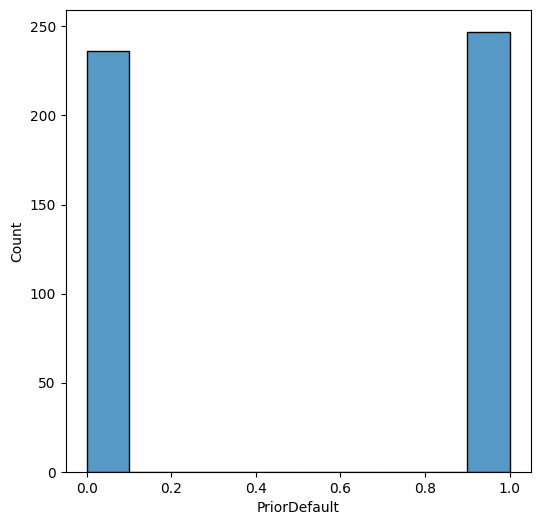

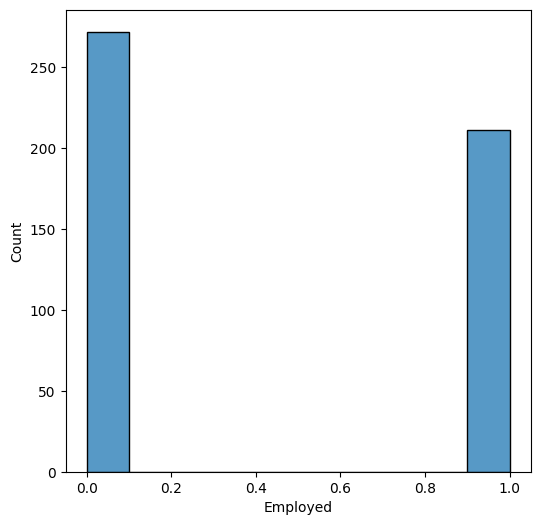

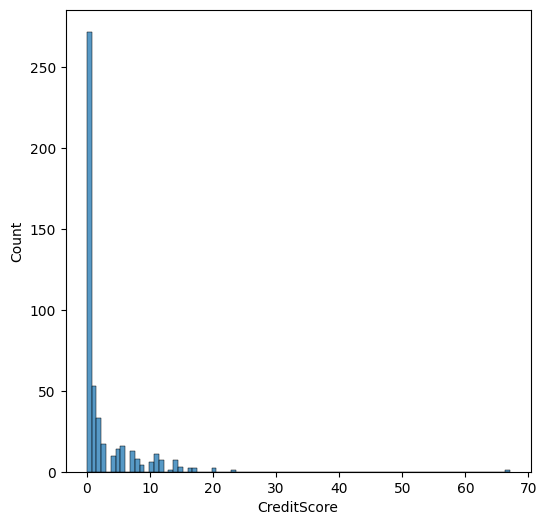

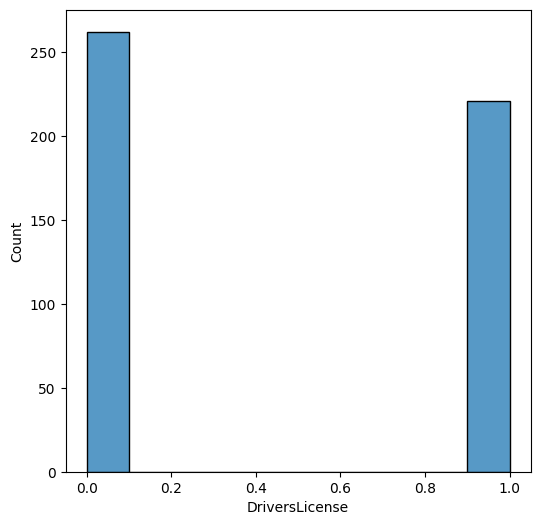

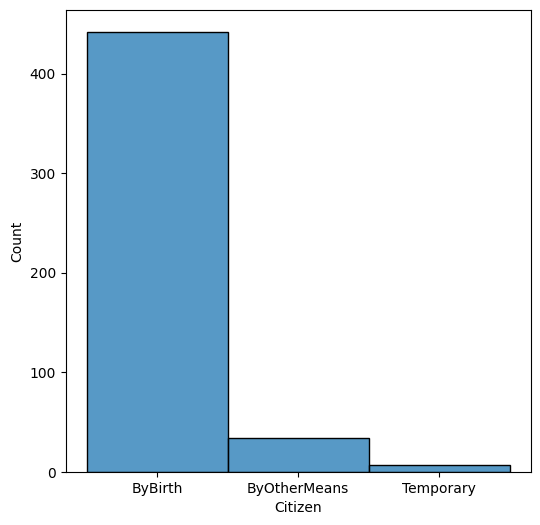

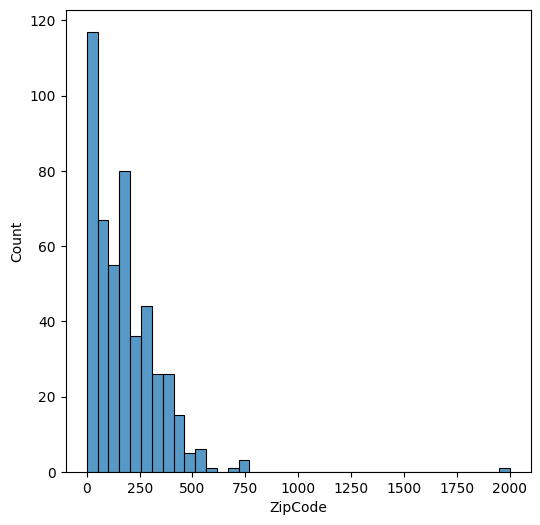

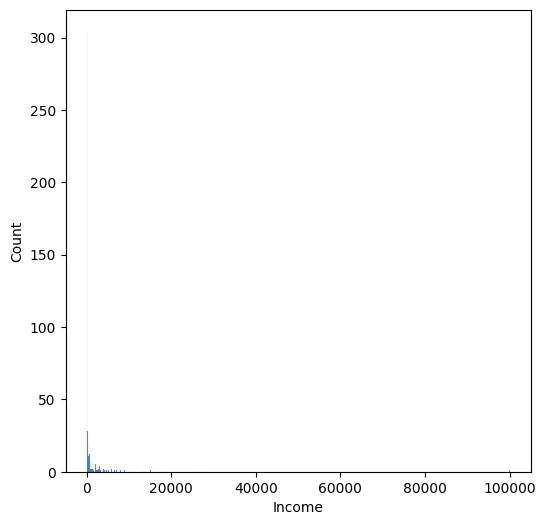

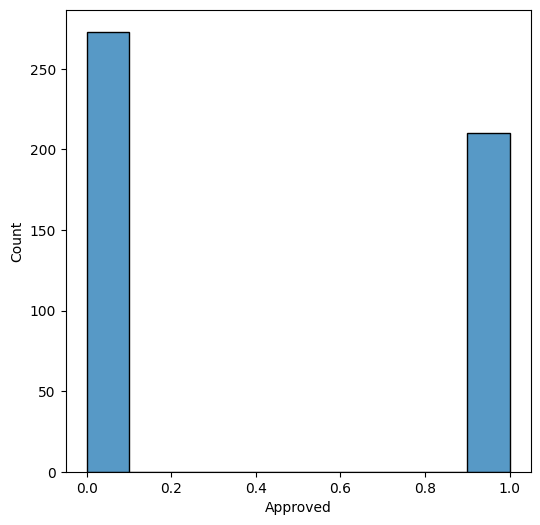

In [ ]:
cols = X_train.columns
for i in cols:
  plt.figure(figsize=(6,6))
  sns.histplot(X_train[i])
  plt.show()

plt.figure(figsize=(6,6))
sns.histplot(y_train)
plt.show()

Data is balanced except "Citizen" and "Ethnicity" columns

In [ ]:
categ_cols = ['Citizen', 'Industry', 'Ethnicity']
label_encoder = LabelEncoder()
for col in categ_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

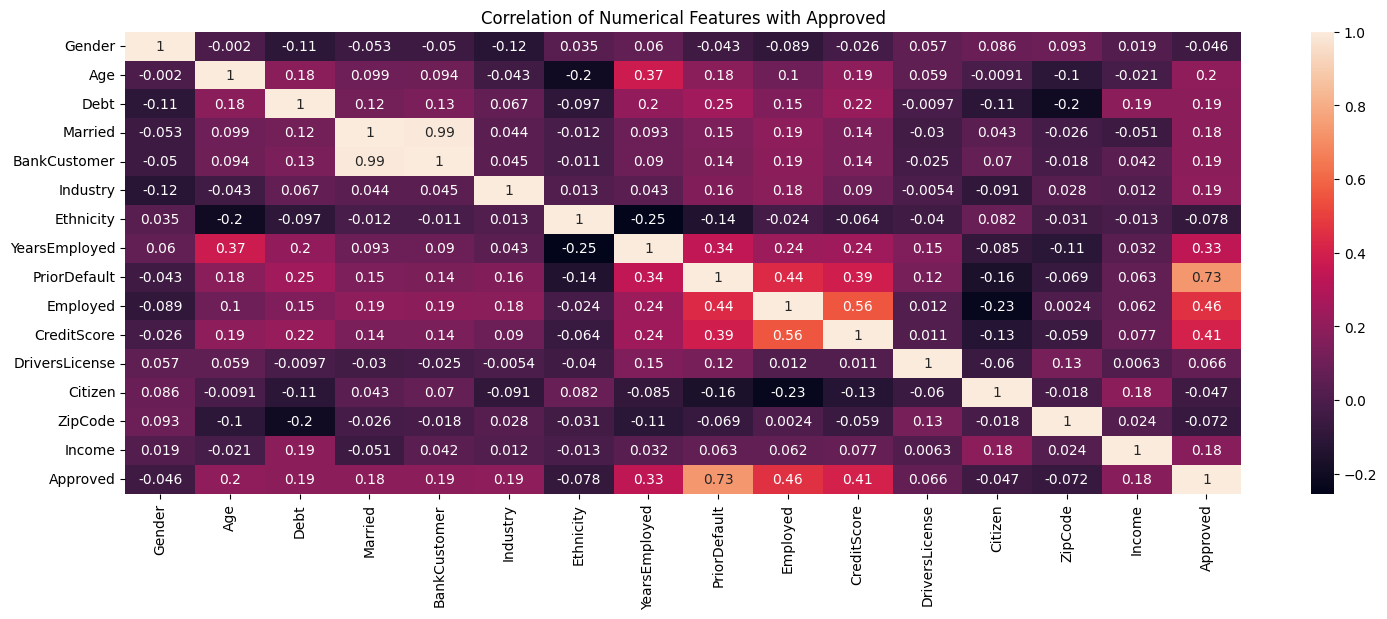

In [ ]:
df2 = pd.merge(X_train, y_train, left_index=True, right_index=True)
# Calculate the correlation with the target variable
correl = df2.corr()

# Plotting the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correl, annot=True)
plt.title('Correlation of Numerical Features with Approved')
plt.show()

There is multi-collinearity but those are the only columns which have a high correlation with target, so keeping all columns

##Case 1: k = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {accuracy_train:.2f}')

print(classification_report(y_train, train_pred))

Train Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       210

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



In [ ]:
y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

print(classification_report(y_test, y_pred))

Test Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       110
           1       0.68      0.62      0.65        97

    accuracy                           0.69       207
   macro avg       0.69      0.68      0.68       207
weighted avg       0.69      0.69      0.68       207



##Case 2: k = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {accuracy_train:.2f}')

print(classification_report(y_train, train_pred))

Train Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       273
           1       0.85      0.76      0.80       210

    accuracy                           0.83       483
   macro avg       0.84      0.83      0.83       483
weighted avg       0.84      0.83      0.83       483



In [ ]:
y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

print(classification_report(y_test, y_pred))

Test Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       110
           1       0.63      0.55      0.59        97

    accuracy                           0.64       207
   macro avg       0.64      0.63      0.63       207
weighted avg       0.64      0.64      0.63       207



##Case 3:  k = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {accuracy_train:.2f}')

print(classification_report(y_train, train_pred))

Train Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       273
           1       0.81      0.67      0.73       210

    accuracy                           0.79       483
   macro avg       0.79      0.77      0.78       483
weighted avg       0.79      0.79      0.78       483



In [ ]:
y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

print(classification_report(y_test, y_pred))

Test Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.65      0.79      0.72       110
           1       0.69      0.53      0.60        97

    accuracy                           0.67       207
   macro avg       0.67      0.66      0.66       207
weighted avg       0.67      0.67      0.66       207



##Case 4: k = 7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {accuracy_train:.2f}')

print(classification_report(y_train, train_pred))

Train Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       273
           1       0.78      0.63      0.70       210

    accuracy                           0.76       483
   macro avg       0.77      0.75      0.75       483
weighted avg       0.76      0.76      0.76       483



In [ ]:
y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

print(classification_report(y_test, y_pred))

Test Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       110
           1       0.63      0.49      0.55        97

    accuracy                           0.63       207
   macro avg       0.63      0.62      0.62       207
weighted avg       0.63      0.63      0.62       207



##Case 5: k = 9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, train_pred)
print(f'Train Accuracy: {accuracy_train:.2f}')

print(classification_report(y_train, train_pred))

Train Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       273
           1       0.76      0.63      0.69       210

    accuracy                           0.75       483
   macro avg       0.76      0.74      0.74       483
weighted avg       0.75      0.75      0.75       483



In [ ]:
y_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy_test:.2f}')

print(classification_report(y_test, y_pred))

Test Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       110
           1       0.62      0.52      0.56        97

    accuracy                           0.63       207
   macro avg       0.63      0.62      0.62       207
weighted avg       0.63      0.63      0.62       207



##Visualizing Trend with k-values

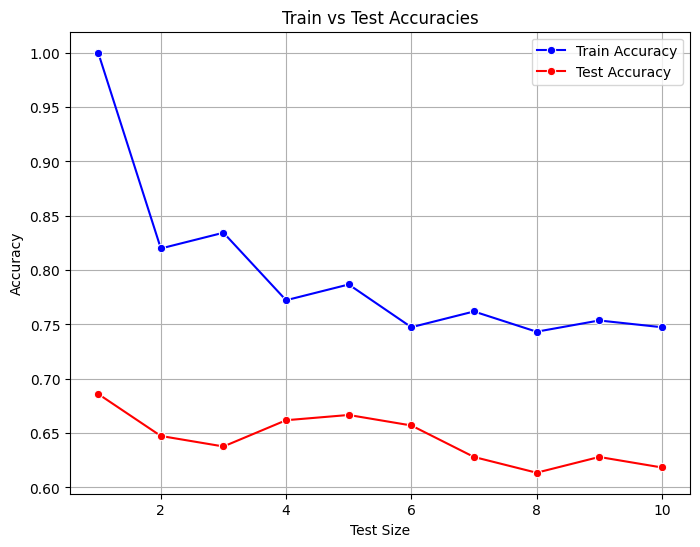

In [ ]:
train_accuracy = []
test_accuracy = []

k_values = list(range(1, 11))
# Iterate over different test sizes
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracies
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Append to lists
    train_accuracy.append(accuracy_train)
    test_accuracy.append(accuracy_test)


plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
sns.lineplot(x=k_values, y=test_accuracy, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.title('Train vs Test Accuracies')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

##Findings
1. After Preprocessing and setting k-parameter to 1 the model overfitted as can be seen in the results.
2. Changing k value to 3 impacts a lot towards training and also the model still overfits.
3. Imputing k value to 5 the performance depreciates but the model is more generalized and performs well on test.
4. With k parameter set to 7 the model does not perform any better and stays almost the same.
5. Trying with k = 9, the model performance on training lowers and model performs no better.

###Concluding it, as the k>5 increases the model performs poorely with the given dataset and generalizes well with k=5. As the k value decreases from k<5, the models tends to overfit.

